## Engagement Score Prediction 

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import wordcloud
import nltk
!nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


'nltk.download' is not recognized as an internal or external command,
operable program or batch file.


In [254]:
len(stop)

179

In [256]:
df=pd.read_excel('data_final.xlsx')
df=df.dropna()
print (df.shape) ; df.head()

(2969, 12)


,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id
0,Chicago,[Verse 1]\nWhen you called me up this morning\...,Hot100,1,Look Away,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,called morning told new love found said happy ...,call morning tell new love find say happy real...,1,4fb25ccd98e9aff41259ccc11c3c636609180e8e
1,Bobby Brown,Get busy!\n\n[Chorus]\nEverybody's talking all...,Hot100,2,My Prerogative,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,get busy chorus everybody talking stuff let li...,get busy chorus everybody talk stuff let live ...,1,db815992930d3614142c44154b78798028c7207e
2,Poison,[Verse 1]\nWe both lie silently still in the d...,Hot100,3,Every Rose Has Its Thorn,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lie silently still dead night although lie clo...,lie silently still dead night although lie clo...,1,4f6283ee0b9f9e18763adb1c987b50c5e705dc13
3,Paula Abdul,[Verse 1]\nLost in a dream\nI don't know which...,Hot100,4,Straight Up,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lost dream know way go ahlet say seem baby mov...,lose dream know way go ahlet say seem baby mov...,1,cace324cef06cc6e71ec16470a97dd20390d3491
4,Janet Jackson,[Verse 1]\nShot like an arrow going through my...,Hot100,5,Miss You Much,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,shot like arrow going heart pain feel feel whe...,shoot like arrow go heart pain feel feel whene...,1,15ae333443d0bb5dde729d4f05989ff860531cde


In [257]:
rk_eg = df[['rank', 'engagement_high']]
rk_eg['engagement_high'][rk_eg['rank']<=25].unique()
rk_eg['engagement_high'][rk_eg['rank']>25].unique()

array([0], dtype=int64)

In [258]:
# word_vectorizer = CountVectorizer(ngram_range=(2,2),stop_words='english',
#                                   analyzer ='word',max_features=25)
# bigrams=word_vectorizer.fit(df['lyrics_lem']).vocabulary_
# bigrams


In [259]:
# tri = CountVectorizer(ngram_range=(3,3),max_features=50,
#                       stop_words='english',analyzer ='word')
# trigrams=tri.fit(df['lyrics_lem']).vocabulary_
# trigrams

In [260]:
df.head(3)

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id
0,Chicago,[Verse 1]\nWhen you called me up this morning\...,Hot100,1,Look Away,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,called morning told new love found said happy ...,call morning tell new love find say happy real...,1,4fb25ccd98e9aff41259ccc11c3c636609180e8e
1,Bobby Brown,Get busy!\n\n[Chorus]\nEverybody's talking all...,Hot100,2,My Prerogative,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,get busy chorus everybody talking stuff let li...,get busy chorus everybody talk stuff let live ...,1,db815992930d3614142c44154b78798028c7207e
2,Poison,[Verse 1]\nWe both lie silently still in the d...,Hot100,3,Every Rose Has Its Thorn,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lie silently still dead night although lie clo...,lie silently still dead night although lie clo...,1,4f6283ee0b9f9e18763adb1c987b50c5e705dc13


## Baseline Accuracy: 75%

In [261]:
len(df[df['engagement_high']==0])/(len(df[df['engagement_high']==1])+len(df[df['engagement_high']==0]))


0.7507578309195015

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score 

X = df.drop('engagement_high',axis=1)
y = df['engagement_high']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **1. Prediction with Unigrams **


In [263]:
corpus1 = X_train['lyrics_lem'].tolist() 
vectorizer = TfidfVectorizer(max_features=500)
X_tr = vectorizer.fit_transform(corpus1)
corpus2 = X_test['lyrics_lem'].tolist()
X_ts = vectorizer.transform(corpus2)

data_tr = X_tr.toarray()
dfx2_tr =pd.DataFrame(data=data_tr[0:,0:],
            index=[i for i in range(data_tr.shape[0])],
            columns=[vectorizer.get_feature_names()])

data_ts = X_ts.toarray()
dfx2_ts =pd.DataFrame(data=data_ts[0:,0:],
            index=[i for i in range(data_ts.shape[0])],
            columns=[vectorizer.get_feature_names()])

In [267]:
# dfx2_tr.shape[0] + dfx2_ts.shape[0]

In [268]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
print("="*100)
from sklearn.metrics import confusion_matrix
#print("Train confusion matrix")

Accuracy Score: 0.8922558922558923
ROC_AUC Score: 0.8907172373081464
F1 Score: 0.7499999999999999
Confusion Matrix:
Confusion matrix, without normalization


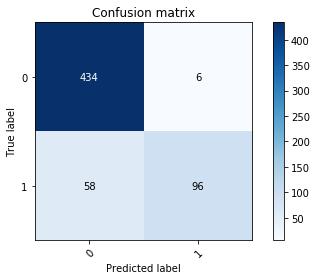

In [269]:
model = LogisticRegression()
model.fit(X_tr,y_train)
y_pred = model.predict(X_ts)
y_pred_score = model.predict_proba(X_ts)[:,1]
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('ROC_AUC Score:',roc_auc_score(y_test,y_pred_score))
print('F1 Score:',f1_score(y_test,y_pred))
print('Confusion Matrix:')
#pd.DataFrame(cm, columns=['actual', 'predicted'])


plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_pred, classes = np.unique(y_test),
                     title = 'Confusion matrix')

Accuracy Score: 0.8282828282828283
ROC_AUC Score: 0.8945395513577332
F1 Score: 0.6999999999999998
Confusion Matrix:
Confusion matrix, without normalization


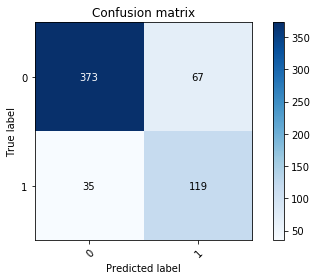

In [272]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_tr,y_train)
y_pred = model.predict(X_ts)
y_pred_score = model.predict_proba(X_ts)[:,1]
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('ROC_AUC Score:',roc_auc_score(y_test,y_pred_score))
print('F1 Score:',f1_score(y_test,y_pred))
print('Confusion Matrix:')
#pd.DataFrame(cm, columns=['actual', 'predicted'])


plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_pred, classes = np.unique(y_test),
                     title = 'Confusion matrix')


## **2. Prediction with bigrams **

In [273]:
corpus200 = X_train['lyrics_lem'].tolist() 
vectorizer2 = TfidfVectorizer(ngram_range=(2, 2), max_features=500)
X_tr200 = vectorizer2.fit_transform(corpus200)
corpus201 = X_test['lyrics_lem'].tolist()
X_ts200 = vectorizer2.transform(corpus201)
#print(vectorizer2.get_feature_names())

Accuracy Score: 0.8838383838383839
ROC_AUC Score: 0.871745867768595
F1 Score: 0.7294117647058824
Confusion Matrix:
Confusion matrix, without normalization


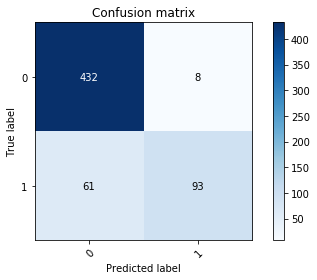

In [274]:
model = LogisticRegression()
model.fit(X_tr200,y_train)
y_pred2 = model.predict(X_ts200)
y_pred_score2 = model.predict_proba(X_ts200)[:,1]
cm = confusion_matrix(y_test, y_pred2)

print('Accuracy Score:',accuracy_score(y_test,y_pred2))
print('ROC_AUC Score:',roc_auc_score(y_test,y_pred_score2))
print('F1 Score:',f1_score(y_test,y_pred2))
print('Confusion Matrix:')
  

plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_pred2, classes = np.unique(y_test),
                     title = 'Confusion matrix')

## **3. Prediction with trigrams **



In [275]:
corpus300 = X_train['lyrics_lem'].tolist() 
vectorizer3 = TfidfVectorizer(ngram_range=(3, 3), max_features=500)
X_tr300 = vectorizer3.fit_transform(corpus300)
corpus301 = X_test['lyrics_lem'].tolist()
X_ts300 = vectorizer3.transform(corpus301)
#print(vectorizer3.get_feature_names())

Accuracy Score: 0.8653198653198653
ROC_AUC Score: 0.8563090318772136
F1 Score: 0.6551724137931034
Confusion Matrix:
Confusion matrix, without normalization


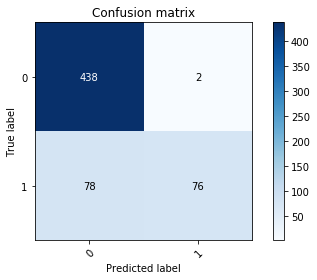

In [276]:
model = LogisticRegression()
model.fit(X_tr300,y_train)
y_pred3 = model.predict(X_ts300)
y_pred_score3 = model.predict_proba(X_ts300)[:,1]
cm = confusion_matrix(y_test, y_pred3)

print('Accuracy Score:',accuracy_score(y_test,y_pred3))
print('ROC_AUC Score:',roc_auc_score(y_test,y_pred_score3))
print('F1 Score:',f1_score(y_test,y_pred3))
print('Confusion Matrix:')
  

plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_pred3, classes = np.unique(y_test),
                     title = 'Confusion matrix')

### Double the number of features for trigrams could yield comparable accuracy with bigrams 


Accuracy Score: 0.8787878787878788
ROC_AUC Score: 0.8874926210153483
F1 Score: 0.7
Confusion Matrix:
Confusion matrix, without normalization


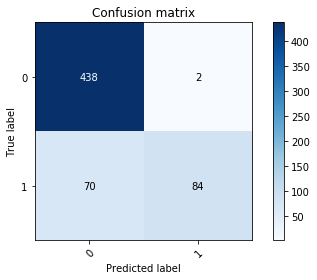

In [277]:
corpus300 = X_train['lyrics_lem'].tolist() 
vectorizer3 = TfidfVectorizer(ngram_range=(3, 3), max_features=1000)
X_tr300 = vectorizer3.fit_transform(corpus300)
corpus301 = X_test['lyrics_lem'].tolist()
X_ts300 = vectorizer3.transform(corpus301)
#print(vectorizer3.get_feature_names())

model = LogisticRegression()
model.fit(X_tr300,y_train)
y_pred3 = model.predict(X_ts300)
y_pred_score3 = model.predict_proba(X_ts300)[:,1]
cm = confusion_matrix(y_test, y_pred3)

print('Accuracy Score:',accuracy_score(y_test,y_pred3))
print('ROC_AUC Score:',roc_auc_score(y_test,y_pred_score3))
print('F1 Score:',f1_score(y_test,y_pred3))
print('Confusion Matrix:')
  

plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_pred3, classes = np.unique(y_test),
                     title = 'Confusion matrix')

## Regressing artist, may not need to do this 

In [278]:
# df['artist']
# artists = df.artist.unique()
# artists
# df_artist = df.reindex(columns=artists) 
# df_artist.head(3)

In [279]:
# df_artist.iloc[0,0] = 1

In [280]:
# df_artist.shape
# df['engagement_high'].shape

In [281]:
# for i in range(2969):
#   df_artist.iloc[i,i] = 1
# df_artist
# df_artist['artist'] = df['artist']


## sentiment analysis 

In [282]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#getting the sentiment scores
chk=[]
for items in df['lyrics_lem']:
    chk.append(analyser.polarity_scores(items))

#into a dataframe
scorels=pd.DataFrame(chk)
df_new=df.merge(scorels, holeft_index=True, right_index=True)
df_new.head(5)

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id,compound,neg,neu,pos
0,Chicago,[Verse 1]\nWhen you called me up this morning\...,Hot100,1,Look Away,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,called morning told new love found said happy ...,call morning tell new love find say happy real...,1,4fb25ccd98e9aff41259ccc11c3c636609180e8e,0.9939,0.022,0.675,0.304
1,Bobby Brown,Get busy!\n\n[Chorus]\nEverybody's talking all...,Hot100,2,My Prerogative,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,get busy chorus everybody talking stuff let li...,get busy chorus everybody talk stuff let live ...,1,db815992930d3614142c44154b78798028c7207e,0.0892,0.077,0.849,0.074
2,Poison,[Verse 1]\nWe both lie silently still in the d...,Hot100,3,Every Rose Has Its Thorn,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lie silently still dead night although lie clo...,lie silently still dead night although lie clo...,1,4f6283ee0b9f9e18763adb1c987b50c5e705dc13,0.9423,0.163,0.588,0.249
3,Paula Abdul,[Verse 1]\nLost in a dream\nI don't know which...,Hot100,4,Straight Up,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lost dream know way go ahlet say seem baby mov...,lose dream know way go ahlet say seem baby mov...,1,cace324cef06cc6e71ec16470a97dd20390d3491,0.9991,0.044,0.488,0.467
4,Janet Jackson,[Verse 1]\nShot like an arrow going through my...,Hot100,5,Miss You Much,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,shot like arrow going heart pain feel feel whe...,shoot like arrow go heart pain feel feel whene...,1,15ae333443d0bb5dde729d4f05989ff860531cde,-0.9871,0.327,0.565,0.108


In [287]:
df_c = pd.concat([df.reset_index(drop=True),scorels ], axis=1)

In [291]:
df_c.head()

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id,compound,neg,neu,pos
0,Chicago,[Verse 1]\nWhen you called me up this morning\...,Hot100,1,Look Away,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,called morning told new love found said happy ...,call morning tell new love find say happy real...,1,4fb25ccd98e9aff41259ccc11c3c636609180e8e,0.9939,0.022,0.675,0.304
1,Bobby Brown,Get busy!\n\n[Chorus]\nEverybody's talking all...,Hot100,2,My Prerogative,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,get busy chorus everybody talking stuff let li...,get busy chorus everybody talk stuff let live ...,1,db815992930d3614142c44154b78798028c7207e,0.0892,0.077,0.849,0.074
2,Poison,[Verse 1]\nWe both lie silently still in the d...,Hot100,3,Every Rose Has Its Thorn,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lie silently still dead night although lie clo...,lie silently still dead night although lie clo...,1,4f6283ee0b9f9e18763adb1c987b50c5e705dc13,0.9423,0.163,0.588,0.249
3,Paula Abdul,[Verse 1]\nLost in a dream\nI don't know which...,Hot100,4,Straight Up,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lost dream know way go ahlet say seem baby mov...,lose dream know way go ahlet say seem baby mov...,1,cace324cef06cc6e71ec16470a97dd20390d3491,0.9991,0.044,0.488,0.467
4,Janet Jackson,[Verse 1]\nShot like an arrow going through my...,Hot100,5,Miss You Much,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,shot like arrow going heart pain feel feel whe...,shoot like arrow go heart pain feel feel whene...,1,15ae333443d0bb5dde729d4f05989ff860531cde,-0.9871,0.327,0.565,0.108


In [290]:
df_new.columns.values

array(['artist', 'lyrics', 'name', 'rank', 'song', 'url', 'urltag',
       'year', 'lyrics_clean', 'lyrics_lem', 'engagement_high', 'song_id',
       'compound', 'neg', 'neu', 'pos'], dtype=object)

## Regress with compound sentiment score 

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
X1=df_new[['compound']]
y1 = df_new['engagement_high']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)


In [109]:
len(X1), len(y1)

(2965, 2965)

Accuracy Score: 0.7335581787521079
ROC_AUC Score: 0.5281318201658665
F1 Score: 0.0
Confusion Matrix:
Confusion matrix, without normalization


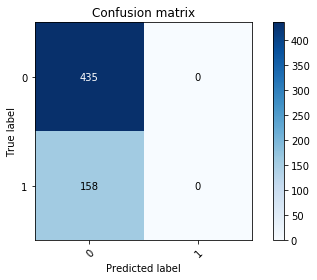

In [114]:
model = LogisticRegression()
model.fit(X1_train,y1_train)
y_pred_sent = model.predict(X1_test)
y_pred_score_sent = model.predict_proba(X1_test)[:,1]
#cm = confusion_matrix(y1_test, y_pred_sent)

print('Accuracy Score:',accuracy_score(y1_test,y_pred_sent))
print('ROC_AUC Score:',roc_auc_score(y1_test,y_pred_score_sent))
print('F1 Score:',f1_score(y1_test,y_pred_sent))
print('Confusion Matrix:')
plot_confusion_matrix(y_true = y1_test, 
                      y_pred = y_pred_sent, classes = np.unique(y1_test),
                     title = 'Confusion matrix')

## Regress with Pos, Neg, Neu sentiment scores 

In [113]:
X2=df_new[['neg','neu','pos']]
y1 = df_new['engagement_high']
X2_train, X2_test, y1_train, y1_test = train_test_split(X2, y1, test_size=0.2, random_state=0)


Accuracy Score: 0.7335581787521079
ROC_AUC Score: 0.4816382947766623
F1 Score: 0.0
Confusion Matrix:
Confusion matrix, without normalization


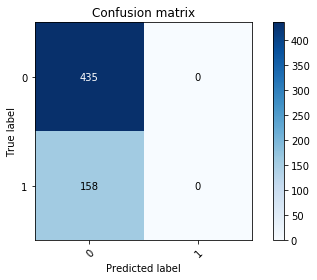

In [115]:
model = LogisticRegression()
model.fit(X2_train,y1_train)
y_pred_sent2 = model.predict(X2_test)
y_pred_score_sent2 = model.predict_proba(X2_test)[:,1]
cm = confusion_matrix(y1_test, y_pred_sent2)

print('Accuracy Score:',accuracy_score(y1_test,y_pred_sent2))
print('ROC_AUC Score:',roc_auc_score(y1_test,y_pred_score_sent2))
print('F1 Score:',f1_score(y1_test,y_pred_sent2))
print('Confusion Matrix:')
plot_confusion_matrix(y_true = y1_test, 
                      y_pred = y_pred_sent2, classes = np.unique(y1_test),
                     title = 'Confusion matrix')

## Regress with topic weights

In [295]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [296]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df_c['lyrics_lem'])

In [297]:
def print_topics(model, count_vectorizer, num_words):
    words = count_vectorizer.get_feature_names()
    for topic_num, topic_words in enumerate(model.components_):
        print("\nTopic #%d:" % topic_num)
        print(" ".join([words[i]
                        for i in topic_words.argsort()[:-num_words-1:-1]]))
        
#parameters
number_topics = 20
number_words = 10

#LDA model
lda = LDA(n_components=number_topics, n_jobs=-1,random_state=30)
lda.fit(count_data)

# Print topics
print("Topics found:")
print_topics(lda, count_vectorizer, number_words)

Topics found:

Topic #0:
na wan hey like yeah baby heyhey night love make

Topic #1:
bitch fuck ai like money lil make nigga niggas sound

Topic #2:
na let know baby love time feel chorus girl make

Topic #3:
oh like dance london girl shit girls na stupid wan

Topic #4:
know chorus like life yeah day way tell leave make

Topic #5:
like wit know ya rock oh ay make man run

Topic #6:
ya mir like du na girl heute mit bist gon

Topic #7:
wait slowly world change time hang little da thing day

Topic #8:
oh yeah ooh know say little like late chorus right

Topic #9:
rompe oh yeah time know cause record feel song let

Topic #10:
best feature secret dirty album live regret beyoncé bieber drake

Topic #11:
smack yeah tell like woohoo babe uhhuh bad gon button

Topic #12:
pump louder time ha ta yy need right turn try

Topic #13:
say booty girl know ass shake hit right want ai

Topic #14:
love feat let stripper ya rollin playin ama yea ay

Topic #15:
uh hump shabada que dame feel love make en te



Topic 0 : lover <br>
Topic 1 : tangibles <br>
Topic 2 : feelings <br>
Topic 3 : foreign <br>

In [298]:
#getting topic weights
weights=lda.transform(count_data)
topic_weights=pd.DataFrame(weights)
#topic_weights=topic_weights.rename(columns={0: "Lover", 1: "Tangible",2:"Feeling",3:"Foreign"})
topic_weights.head()
#Every row is a billboard hot100 song 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000368,0.000368,0.885143,0.000368,0.050601,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.032318,0.026056,0.000368
1,0.000265,0.000265,0.079934,0.000265,0.690541,0.000265,0.000265,0.000265,0.020230,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.161105,0.044221
2,0.000420,0.000420,0.309749,0.000420,0.457320,0.101633,0.000420,0.000420,0.000420,0.000420,0.000420,0.000420,0.000420,0.000420,0.000420,0.000420,0.000420,0.124575,0.000420,0.000420
3,0.317682,0.000263,0.328523,0.000263,0.000263,0.000263,0.000263,0.033047,0.187752,0.000263,0.000263,0.059625,0.000263,0.000263,0.000263,0.000263,0.000263,0.069686,0.000263,0.000263
4,0.000282,0.000282,0.375327,0.000282,0.000282,0.000282,0.224384,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.395486,0.000282


In [299]:
topic_weights.shape

(2969, 20)

In [223]:
# import numpy as np
# topic_weights.compound = topic_weights.compound.astype(float)

In [211]:
topic_weights.fillna(topic_weights.compound)

Index(['Lover', 'Tangible', 'Feeling', 'Foreign', 'compound'], dtype='object')

Accuracy Score: 0.6087689713322091
ROC_AUC Score: 0.6674014258693438
F1 Score: 0.4579439252336449
Confusion Matrix:
Confusion matrix, without normalization


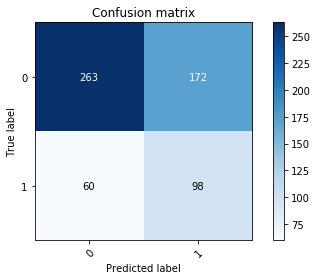

In [234]:
X3= topic_weights
y1 = df_new['engagement_high']
X3_train, X3_test, y1_train, y1_test = train_test_split(X3, y1, test_size=0.2, random_state=0)

model = LogisticRegression(class_weight = 'balanced')
model.fit(X3_train,y1_train)
y_pred_topic = model.predict(X3_test)
y_pred_score_topic = model.predict_proba(X3_test)[:,1]

print('Accuracy Score:',accuracy_score(y1_test,y_pred_topic))
print('ROC_AUC Score:',roc_auc_score(y1_test,y_pred_score_topic))
print('F1 Score:',f1_score(y1_test,y_pred_topic))
print('Confusion Matrix:')
plot_confusion_matrix(y_true = y1_test, 
                      y_pred = y_pred_topic, classes = np.unique(y1_test),
                     title = 'Confusion matrix')



### Regress with both sentiment scores and topic weights

Accuracy Score: 0.7403035413153457
ROC_AUC Score: 0.5388549396187982
F1 Score: 0.4622641509433962
Confusion Matrix:
Confusion matrix, without normalization


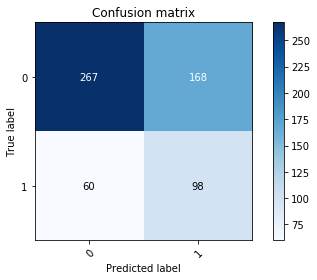

In [346]:
X3['compound'] = X1['compound']
X4 = X3
X3 = X3.drop('compound',axis=1)
X4.shape
np.where(np.isnan(X4)) 
X4.fillna(X4.mean(), inplace=True)
#np.nan_to_num(X4)
y1 = df_new['engagement_high']
X4_train, X4_test, y1_train, y1_test = train_test_split(X4, y1, test_size=0.2, random_state=0)

model = LogisticRegression(class_weight='balanced')
model.fit(X4_train,y1_train)
y_pred_topic_sent = model.predict(X4_test)
y_pred_score_topic_sent = model.predict_proba(X4_test)[:,1]

#

y_pred_score_topic_sent[y_pred_score_topic_sent >= 0.75] = 1
y_pred_score_topic_sent[y_pred_score_topic_sent < 0.75] = 0


print('Accuracy Score:',accuracy_score(y1_test,y_pred_score_topic_sent))
print('ROC_AUC Score:',roc_auc_score(y1_test,y_pred_score_topic_sent))
print('F1 Score:',f1_score(y1_test,y_pred_topic_sent))
print('Confusion Matrix:')
plot_confusion_matrix(y_true = y1_test, 
                      y_pred = y_pred_topic_sent, classes = np.unique(y1_test),
                     title = 'Confusion matrix')

In [331]:
df_c.head(5) # dataframe with sentiment scores 
df_c.shape
df_c.columns.values
# df_c.drop(columns=['artist', 'lyrics','name','rank','song','url','urltag','year','lyrics_clean',
#                   'lyrics_lem','song_id','compound'],inplace = True)
df_c.columns.values
scorels.shape
df_c.columns.values

array(['engagement_high', 'neg', 'neu', 'pos'], dtype=object)

## Regress using unigram and sentiment scores and topic weights 

In [333]:
# df_c1 = pd.concat([df_c.reset_index(drop=True),scorels], axis=1)
# df_c1.shape
# df_c1.columns.values
# scorels.columns.values

array(['compound', 'neg', 'neu', 'pos'], dtype=object)

In [334]:
df_c_1 = pd.concat([scorels.reset_index(drop=True),topic_weights], axis=1)
df_c_1.head(3)
df_c_1.shape

(2969, 24)

In [335]:
corpus_full = df['lyrics_lem'].tolist() 
vectorizer = TfidfVectorizer(max_features=500)
X_lyrics = vectorizer.fit_transform(corpus_full)


data = X_lyrics.toarray()
dfx =pd.DataFrame(data=data[0:,0:],
            index=[i for i in range(data.shape[0])],
            columns=[vectorizer.get_feature_names()])

dfx.shape

(2969, 500)

In [336]:
df_c_2 = pd.concat([df_c_1.reset_index(drop=True),dfx], axis=1)
df_c_2.shape

(2969, 524)

In [342]:
y = df['engagement_high']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df_final = df_c_2.drop('compound',axis=1)
df_final.shape
X=df_final

Accuracy Score: 0.8215488215488216
ROC_AUC Score: 0.8979486422668241
F1 Score: 0.6845238095238095
Confusion Matrix:
Confusion matrix, without normalization


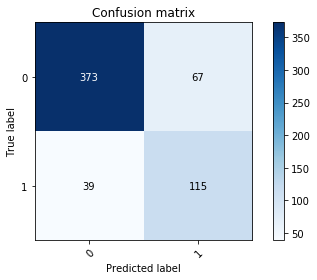

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]

print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('ROC_AUC Score:',roc_auc_score(y_test,y_pred_score))
print('F1 Score:',f1_score(y_test,y_pred))
print('Confusion Matrix:')


plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_pred, classes = np.unique(y_test),
                     title = 'Confusion matrix')

In [368]:
# model_coef = model.coef_[0].tolist()
len(model_coef)
lr_select_full_coef = pd.Series(model_coef) 
# top_features = pd.Series(top20_features)
# lr_sel_features_coef = pd.concat([top_features, lr_select_full_coef], axis=1)
# lr_sel_features_coef.rename(columns={0: "Feature", 1: "Coefficient"}, inplace = True)
# lr_sel_features_coef.set_index("Feature", inplace = True)
model.coef_[0]
lr_select_full_coef
var = X_train.columns.values.tolist()
features = pd.Series(var)
all_features = pd.DataFrame(features)
lr_sel_features_coef = pd.concat([features, lr_select_full_coef], axis=1)
lr_sel_features_coef.rename(columns={0: "Feature", 1: "Coefficient"}, inplace = True)
lr_sel_features_coef.set_index("Feature", inplace = True)
lr_sel_features_coef.sort_values(by='Coefficient')
lr_sel_features_coef['abs_coef'] = np.where(lr_sel_features_coef['Coefficient'] < 0, lr_sel_features_coef['Coefficient']*-1,
                                           lr_sel_features_coef['Coefficient'])
lr_sel_features_coef.sort_values(by='abs_coef', ascending = False)

,Coefficient,abs_coef
Feature,,
"(timbaland,)",2.937700,2.937700
"(rest,)",2.236597,2.236597
"(breakout,)",2.162836,2.162836
"(face,)",2.041192,2.041192
"(ai,)",-2.010332,2.010332
"(head,)",2.002399,2.002399
15,-1.981442,1.981442
"(london,)",1.975081,1.975081
"(forget,)",-1.839869,1.839869


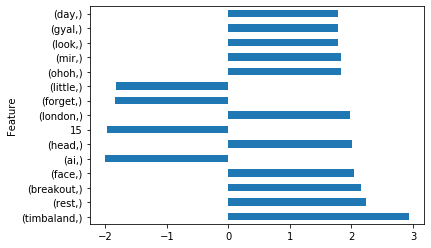

In [377]:
lr_sel_features_coef.sort_values(by='abs_coef', ascending = False)[:15]['Coefficient'].plot(kind = 'barh')